In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
import geopandas as gpd

# DATA PREPARATION

In [ ]:
# Load data
df = pd.read_excel("Data2023.xlsx")
# Change the name of Slovakia that it is the same as in geopandas (it will be usefull later)
df.loc[df['Country'] == 'Slovak Republic', 'Country'] = 'Slovakia'

# Pick chosen columns
data = df[['Goal 1 Score', 'Goal 2 Score', 'Goal 3 Score', 'Goal 4 Score', 'Goal 5 Score', 'Goal 6 Score', 'Goal 7 Score', 'Goal 8 Score', 'Goal 9 Score', 'Goal 10 Score', 'Goal 11 Score', 'Goal 12 Score', 'Goal 13 Score', 'Goal 14 Score', 'Goal 15 Score', 'Goal 16 Score', 'Goal 17 Score']]
data.index = df['Country']

# Print top of the dataset
data.head()


,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,Goal 7 Score,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
Country,,,,,,,,,,,,,,,,,
Austria,76.942333,63.8744,83.886667,66.825000,65.490667,93.916500,82.787000,72.564000,93.838000,98.0150,77.834500,53.013000,63.969000,96.1735,73.173667,86.0267,72.762000
Belgium,77.498000,42.8936,83.339111,67.077143,75.549500,84.324500,62.923000,80.726750,92.283111,100.0000,76.941000,42.257143,52.888000,61.8324,76.273667,79.0491,51.613250
Bulgaria,47.350000,49.5708,67.933824,40.515000,56.095500,79.435000,49.460000,59.815875,39.685778,53.7105,51.106667,57.272571,81.269000,75.9172,84.554167,62.3448,55.106667
Cyprus,72.836000,46.4362,83.406937,58.689429,47.109667,61.222667,52.293667,65.171875,55.302111,88.0430,60.044500,37.639429,61.878333,58.6155,82.054500,73.4260,33.125000
Czechia,83.885333,61.7892,77.956944,59.290000,50.095500,88.775000,67.385667,83.938375,69.412000,100.0000,73.959500,53.818000,71.254333,83.2655,88.123667,81.4566,69.742500


In [ ]:
# Descriptive statistics
data.describe()

,Goal 1 Score,Goal 2 Score,Goal 3 Score,Goal 4 Score,Goal 5 Score,Goal 6 Score,Goal 7 Score,Goal 8 Score,Goal 9 Score,Goal 10 Score,Goal 11 Score,Goal 12 Score,Goal 13 Score,Goal 14 Score,Goal 15 Score,Goal 16 Score,Goal 17 Score
count,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000,27.000000
mean,70.810778,56.356300,80.817473,66.535190,61.798969,83.652759,65.220704,72.344562,70.019959,89.586593,70.858362,51.479397,68.784395,75.434043,79.520442,76.659389,63.542052
std,9.482628,8.543541,6.835431,12.311376,8.976806,8.984854,13.347699,8.568710,18.073404,10.838345,9.653915,10.069470,12.257994,11.529268,10.556472,8.817553,13.219619
min,47.350000,35.052000,67.933824,34.500143,42.323833,61.222667,37.528333,57.050000,38.337333,53.710500,49.354333,22.938000,32.254000,52.437667,59.527250,59.698500,33.125000
25%,63.767000,52.909300,77.486399,59.113571,55.659167,79.760750,59.378833,64.462312,56.160611,86.014500,65.353000,46.512143,62.903333,68.195667,73.115433,70.974350,53.378333
50%,74.121000,59.111800,82.168000,67.077143,63.035667,84.324500,62.973667,72.604250,67.894000,92.187500,73.168833,53.151714,71.254333,74.688000,80.997250,76.858000,66.423500
75%,77.227333,62.956400,85.875028,76.138000,67.700583,89.791250,73.398000,79.306938,88.145667,97.687000,77.387750,58.045643,77.849167,84.584750,87.398433,83.463000,71.504750
max,83.885333,65.673400,91.024444,85.270714,75.549500,94.317000,95.501000,85.644250,96.891222,100.000000,86.976000,68.956286,84.568000,96.173500,97.408000,91.033000,84.369250


In [ ]:
# Coefficient of variation
coef_var_value = data.apply(lambda x: np.std(x) / np.mean(x) if np.std(x) != 0 else 0)

coef_var_value_df = pd.DataFrame({'Coefficient_of_Variation': coef_var_value})
print(coef_var_value_df)

               Coefficient_of_Variation
Goal 1 Score                   0.131412
Goal 2 Score                   0.148765
Goal 3 Score                   0.082998
Goal 4 Score                   0.181577
Goal 5 Score                   0.142543
Goal 6 Score                   0.105399
Goal 7 Score                   0.200829
Goal 8 Score                   0.116229
Goal 9 Score                   0.253293
Goal 10 Score                  0.118720
Goal 11 Score                  0.133696
Goal 12 Score                  0.191946
Goal 13 Score                  0.174878
Goal 14 Score                  0.149982
Goal 15 Score                  0.130270
Goal 16 Score                  0.112872
Goal 17 Score                  0.204156


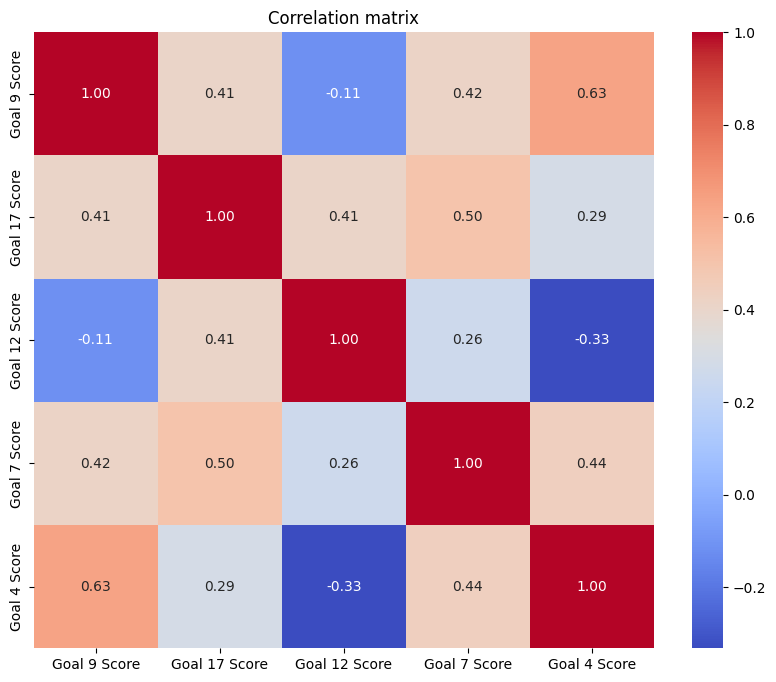

In [ ]:
# Correlation matrix
goalsdf = data[['Goal 9 Score', 'Goal 17 Score', 'Goal 12 Score', 'Goal 7 Score', 'Goal 4 Score']]
corr_matrix = goalsdf.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation matrix')
plt.show()

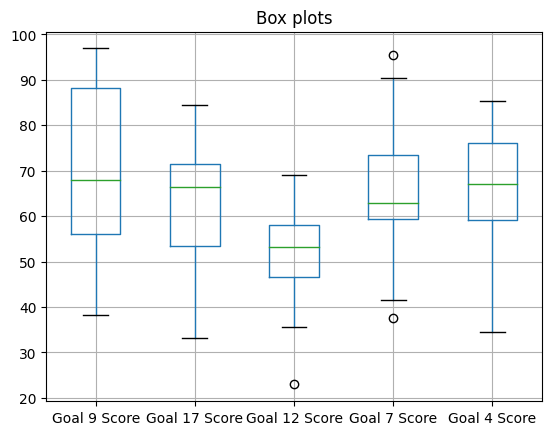

In [ ]:
# Box plots
goalsdf.boxplot()
plt.title('Box plots')
plt.show()

In [ ]:
# Standardization of untransformed data
standardized_data = pd.DataFrame(scale(goalsdf), columns=goalsdf.columns, index=goalsdf.index)
print(standardized_data.head())

          Goal 9 Score  Goal 17 Score  Goal 12 Score  Goal 7 Score  \
Country                                                              
Austria       1.342955       0.710730       0.155204      1.341124   
Belgium       1.255284      -0.919545      -0.933309     -0.175422   
Bulgaria     -1.710360      -0.650251       0.586280     -1.203274   
Cyprus       -0.829850      -2.344733      -1.400631     -0.986933   
Czechia      -0.034279       0.477969       0.236671      0.165287   

          Goal 4 Score  
Country                 
Austria       0.023988  
Belgium       0.044859  
Bulgaria     -2.153769  
Cyprus       -0.649417  
Czechia      -0.599706  


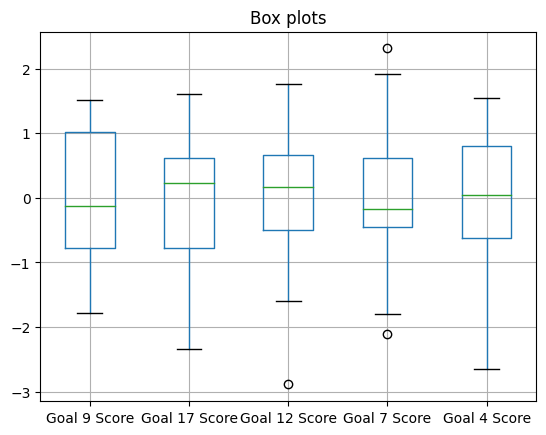

In [ ]:
# Box plots
standardized_data.boxplot()
plt.title('Box plots')
plt.show()

# CLUSTER ANALYSIS

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

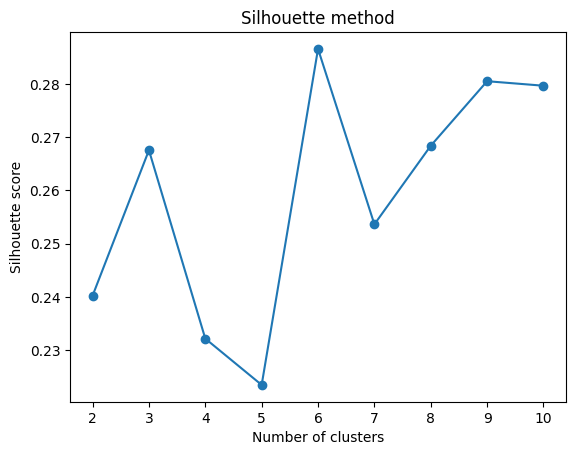

In [ ]:
# K-means clustering

# Choosing the optimal number of clusters using the silhouette method
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(standardized_data)
    silhouette_avg = silhouette_score(standardized_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette method')
plt.show()

In [ ]:
# Finding centroids and assigning data to clusters
kmeans = KMeans(n_clusters=6, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(standardized_data)

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=goalsdf.columns)
print(cluster_centers)

   Goal 9 Score  Goal 17 Score  Goal 12 Score  Goal 7 Score  Goal 4 Score
0     -1.748375      -1.003974       0.823490     -0.810395     -2.402703
1     -0.127043       0.565321       0.671515     -0.202825     -0.393960
2      0.083679      -1.346719      -0.405782     -0.274545      0.069968
3      1.412069       1.141198       0.115164      1.659024      0.961833
4      0.089991      -0.761345      -1.992055     -1.430574      0.577921
5     -0.523155       0.269194      -0.272572      0.892462      0.938023


<ipython-input-202-a458eb163d89>:4: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


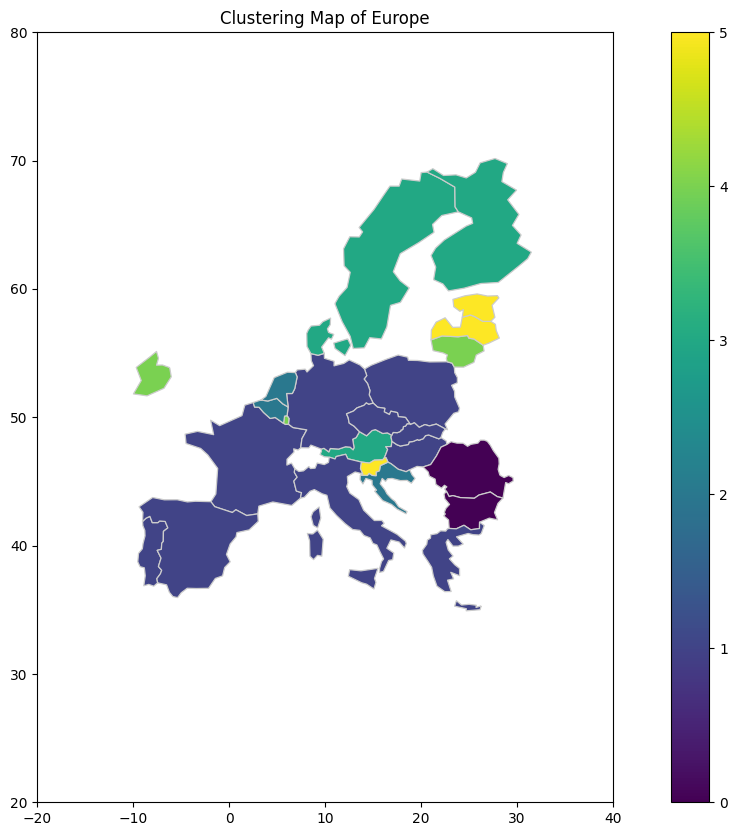

In [ ]:
def plot_cluster_map(cluster_labels, df):

    # Load the Europe map data
    europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Filter the Europe map data
    europe = europe[europe.continent == 'Europe']

    # Merge the cluster labels with the dataframe containing country names
    df_with_clusters = pd.concat([df, pd.DataFrame({'Country': df.index, 'Cluster': cluster_labels})], axis=1)

    # Merge the Europe map data with the dataframe containing cluster labels
    europe_with_clusters = pd.merge(europe, df_with_clusters, left_on='name', right_on='Country', how='left')

    # Plot the Europe map with cluster labels
    fig, ax = plt.subplots(1, 1, figsize=(15, 10))
    europe_with_clusters.plot(column='Cluster', cmap='viridis', linewidth=0.9, ax=ax, edgecolor='0.8', legend=True)
    ax.set_xlim([-20, 40])
    ax.set_ylim([20, 80])
    plt.title('Clustering Map of Europe')
    plt.show()
    return europe_with_clusters
# Using the plot_cluster_map function with cluster labels obtained using the k-means algorithm (cluster_labels) and the DataFrame df containing the data
europe_with_clusters = plot_cluster_map(cluster_labels, standardized_data)


In [ ]:
standardized_data['cluster_labels'] = cluster_labels

clusters_df = standardized_data.groupby('cluster_labels').mean()

clusters_df = clusters_df.transpose()

display(clusters_df)


cluster_labels,0,1,2,3,4,5
Goal 9 Score,-1.748375,-0.127043,0.083679,1.412069,0.089991,-0.523155
Goal 17 Score,-1.003974,0.565321,-1.346719,1.141198,-0.761345,0.269194
Goal 12 Score,0.823490,0.671515,-0.405782,0.115164,-1.992055,-0.272572
Goal 7 Score,-0.810395,-0.202825,-0.274545,1.659024,-1.430574,0.892462
Goal 4 Score,-2.402703,-0.393960,0.069968,0.961833,0.577921,0.938023


In [ ]:
clusters_df.describe()

cluster_labels,0,1,2,3,4,5
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-1.028391,0.102602,-0.374680,1.057858,-0.703212,0.260790
std,1.212919,0.482278,0.583879,0.589853,1.056412,0.662716
min,-2.402703,-0.393960,-1.346719,0.115164,-1.992055,-0.523155
25%,-1.748375,-0.202825,-0.405782,0.961833,-1.430574,-0.272572
50%,-1.003974,-0.127043,-0.274545,1.141198,-0.761345,0.269194
75%,-0.810395,0.565321,0.069968,1.412069,0.089991,0.892462
max,0.823490,0.671515,0.083679,1.659024,0.577921,0.938023


In [ ]:
# Create a dictionary to store lists of associated countries for each value in the cluster_labels column
countries_by_cluster = {}

# Iterate over the unique values in the cluster_labels column
for cluster_label in standardized_data['cluster_labels'].unique():
    # Select countries belonging to a particular cluster
    countries = standardized_data.loc[standardized_data['cluster_labels'] == cluster_label].index.tolist()
    # Add the list of countries to the dictionary, where the key is the value in the cluster_labels column
    countries_by_cluster[cluster_label] = countries

# Display the lists of countries associated with each cluster in ascending order of cluster labels
for cluster_label in sorted(countries_by_cluster.keys()):
    countries = countries_by_cluster[cluster_label]
    print(f"Cluster {cluster_label}: {countries}")


Cluster 0: ['Bulgaria', 'Romania']
Cluster 1: ['Czechia', 'Germany', 'Spain', 'France', 'Greece', 'Hungary', 'Italy', 'Poland', 'Portugal', 'Slovakia']
Cluster 2: ['Belgium', 'Cyprus', 'Croatia', 'Malta', 'Netherlands']
Cluster 3: ['Austria', 'Denmark', 'Finland', 'Sweden']
Cluster 4: ['Ireland', 'Lithuania', 'Luxembourg']
Cluster 5: ['Estonia', 'Latvia', 'Slovenia']
